# Scenario
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. To determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

## Goal
Evaluate A/B testing results and decide which marketing strategy works the best.

## Columns
- **MarketID**: Unique identifier for market.
- **MarketSize**: Size of market area by sales.
- **LocationID**: Unique identifier for store location.
- **AgeOfStore**: Age of store in years.
- **Promotion**: One of three promotions that were tested.
- **Week**: One of four weeks when the promotions were run.
- **SalesInThousands**: Sales amount (in thousands) for a specific `LocationID`, `Promotion`, and `Week`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('WA_Marketing-Campaign.csv')
data.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [4]:
# Convert column 'LocationID' to object type
# Convert specified columns to object type
data[['LocationID', 'Promotion', 'week']] = data[['LocationID', 'Promotion', 'week']].astype(object)

# Verify the changes
print(data.dtypes)

MarketID              int64
MarketSize           object
LocationID           object
AgeOfStore            int64
Promotion            object
week                 object
SalesInThousands    float64
dtype: object


In [5]:
print(data.MarketSize.value_counts())

MarketSize
Medium    320
Large     168
Small      60
Name: count, dtype: int64


In [6]:
print(data.Promotion.value_counts())

Promotion
3    188
2    188
1    172
Name: count, dtype: int64


In [7]:
print(data.week.value_counts())

week
1    137
2    137
3    137
4    137
Name: count, dtype: int64


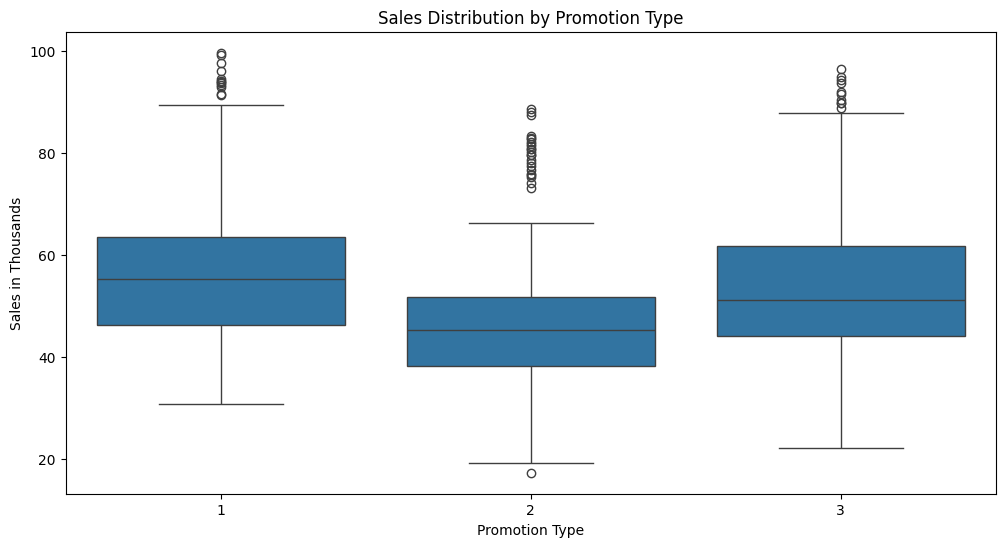

In [8]:
# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=data)
plt.title('Sales Distribution by Promotion Type')
plt.xlabel('Promotion Type')
plt.ylabel('Sales in Thousands')
plt.show()

In [9]:
# Summary statistics
promotion_summary = data.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count'])
print("\nPromotion Summary Statistics:")
print(promotion_summary)


Promotion Summary Statistics:
                mean        std  count
Promotion                             
1          58.099012  16.553782    172
2          47.329415  15.108955    188
3          55.364468  16.766231    188


In [10]:
#the total sales made via each promotion
data.groupby('Promotion')['SalesInThousands'].sum()

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64


Promotion Analysis Results
----------------------------------------------------------------------

Promotion 1:
- Number of Promotions: 172
- Total Revenue: $9993.03
- Mean ARPP: $58.10
- Standard Deviation: $16.55
- Posterior Standard Error: $1.26

Promotion 2:
- Number of Promotions: 188
- Total Revenue: $8897.93
- Mean ARPP: $47.33
- Standard Deviation: $15.11
- Posterior Standard Error: $1.10

Promotion 3:
- Number of Promotions: 188
- Total Revenue: $10408.52
- Mean ARPP: $55.36
- Standard Deviation: $16.77
- Posterior Standard Error: $1.22

Comparative Analysis:
Probability that Promotion 1 is better than Promotion 2: 100.0%
Probability that Promotion 1 is better than Promotion 3: 94.3%
Expected relative lift (1 vs 2): 22.8%
Expected relative lift (1 vs 3): 5.0%
95% Credible Interval for 1 vs 2 Difference: [15.73%, 31.08%]
95% Credible Interval for 1 vs 3 Difference: [-1.41%, 11.39%]


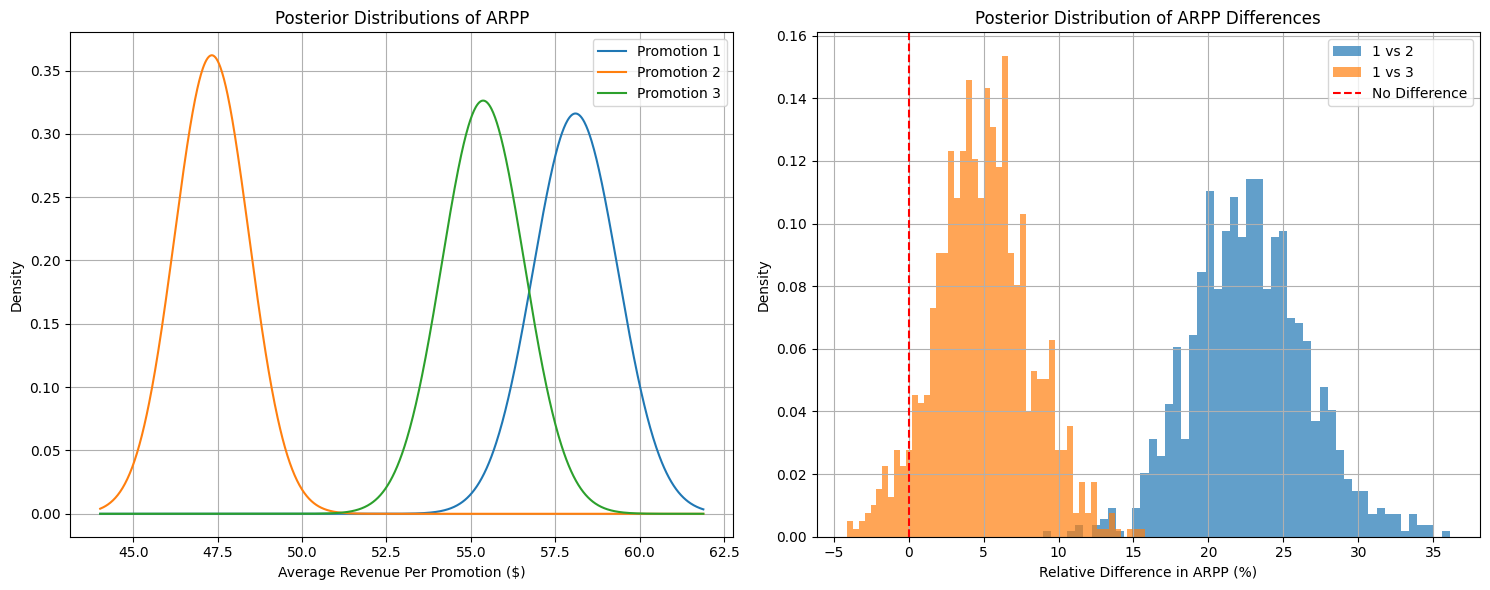

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Updated data with corrected values
data = {
    'Strategy_1': {'no_of_times': 172, 'sales_revenue': 9993.03, 'mean': 58.099012, 'std': 16.553782, 'name': 'Promotion 1'},
    'Strategy_2': {'no_of_times': 188, 'sales_revenue': 8897.93, 'mean': 47.329415, 'std': 15.108955, 'name': 'Promotion 2'},
    'Strategy_3': {'no_of_times': 188, 'sales_revenue': 10408.52, 'mean': 55.364468, 'std': 16.766231, 'name': 'Promotion 3'}
}

# Calculate posterior distributions using the provided summary statistics
posterior = {}
for key in data:
    posterior[key] = {
        'mean': data[key]['mean'],
        'std': data[key]['std'] / np.sqrt(data[key]['no_of_times'])  # Standard error
    }

# Simulation to sample posterior distributions
n_samples = 1000
samples = {key: np.random.normal(posterior[key]['mean'], posterior[key]['std'], n_samples) for key in data}

# Calculate probabilities and relative lifts
prob_Strategy_1_better_Strategy_2 = np.mean(samples['Strategy_1'] > samples['Strategy_2'])
prob_Strategy_1_better_Strategy_3 = np.mean(samples['Strategy_1'] > samples['Strategy_3'])

relative_lift = {
    '1_vs_2': np.mean((samples['Strategy_1'] - samples['Strategy_2']) / samples['Strategy_2'] * 100),
    '1_vs_3': np.mean((samples['Strategy_1'] - samples['Strategy_3']) / samples['Strategy_3'] * 100)
}

# Plotting
plt.figure(figsize=(15, 6))

# Plot 1: Posterior distributions
plt.subplot(1, 2, 1)
x_min = min(posterior[key]['mean'] - 3 * posterior[key]['std'] for key in posterior)
x_max = max(posterior[key]['mean'] + 3 * posterior[key]['std'] for key in posterior)
x = np.linspace(x_min, x_max, 1000)

for key in data:
    plt.plot(x, norm.pdf(x, posterior[key]['mean'], posterior[key]['std']), 
             label=f"{data[key]['name']}")
plt.xlabel("Average Revenue Per Promotion ($)")
plt.ylabel("Density")
plt.title("Posterior Distributions of ARPP")
plt.legend()
plt.grid(True)

# Plot 2: Differences in ARPP
plt.subplot(1, 2, 2)
diff_12 = (samples['Strategy_1'] - samples['Strategy_2']) * 100 / samples['Strategy_2']
diff_13 = (samples['Strategy_1'] - samples['Strategy_3']) * 100 / samples['Strategy_3']

plt.hist(diff_12, bins=50, density=True, alpha=0.7, label="1 vs 2")
plt.hist(diff_13, bins=50, density=True, alpha=0.7, label="1 vs 3")
plt.axvline(x=0, color='red', linestyle='--', label='No Difference')
plt.xlabel("Relative Difference in ARPP (%)")
plt.ylabel("Density")
plt.title("Posterior Distribution of ARPP Differences")
plt.legend()
plt.grid(True)

plt.tight_layout()

# Print results
print("\nPromotion Analysis Results")
print("----------------------------------------------------------------------")
for key in data:
    print(f"\n{data[key]['name']}:")
    print(f"- Number of Promotions: {data[key]['no_of_times']}")
    print(f"- Total Revenue: ${data[key]['sales_revenue']:.2f}")
    print(f"- Mean ARPP: ${data[key]['mean']:.2f}")
    print(f"- Standard Deviation: ${data[key]['std']:.2f}")
    print(f"- Posterior Standard Error: ${posterior[key]['std']:.2f}")

print("\nComparative Analysis:")
print(f"Probability that Promotion 1 is better than Promotion 2: {prob_Strategy_1_better_Strategy_2*100:.1f}%")
print(f"Probability that Promotion 1 is better than Promotion 3: {prob_Strategy_1_better_Strategy_3*100:.1f}%")
print(f"Expected relative lift (1 vs 2): {relative_lift['1_vs_2']:.1f}%")
print(f"Expected relative lift (1 vs 3): {relative_lift['1_vs_3']:.1f}%")
print(f"95% Credible Interval for 1 vs 2 Difference: [{np.percentile(diff_12, 2.5):.2f}%, {np.percentile(diff_12, 97.5):.2f}%]")
print(f"95% Credible Interval for 1 vs 3 Difference: [{np.percentile(diff_13, 2.5):.2f}%, {np.percentile(diff_13, 97.5):.2f}%]")

plt.show()



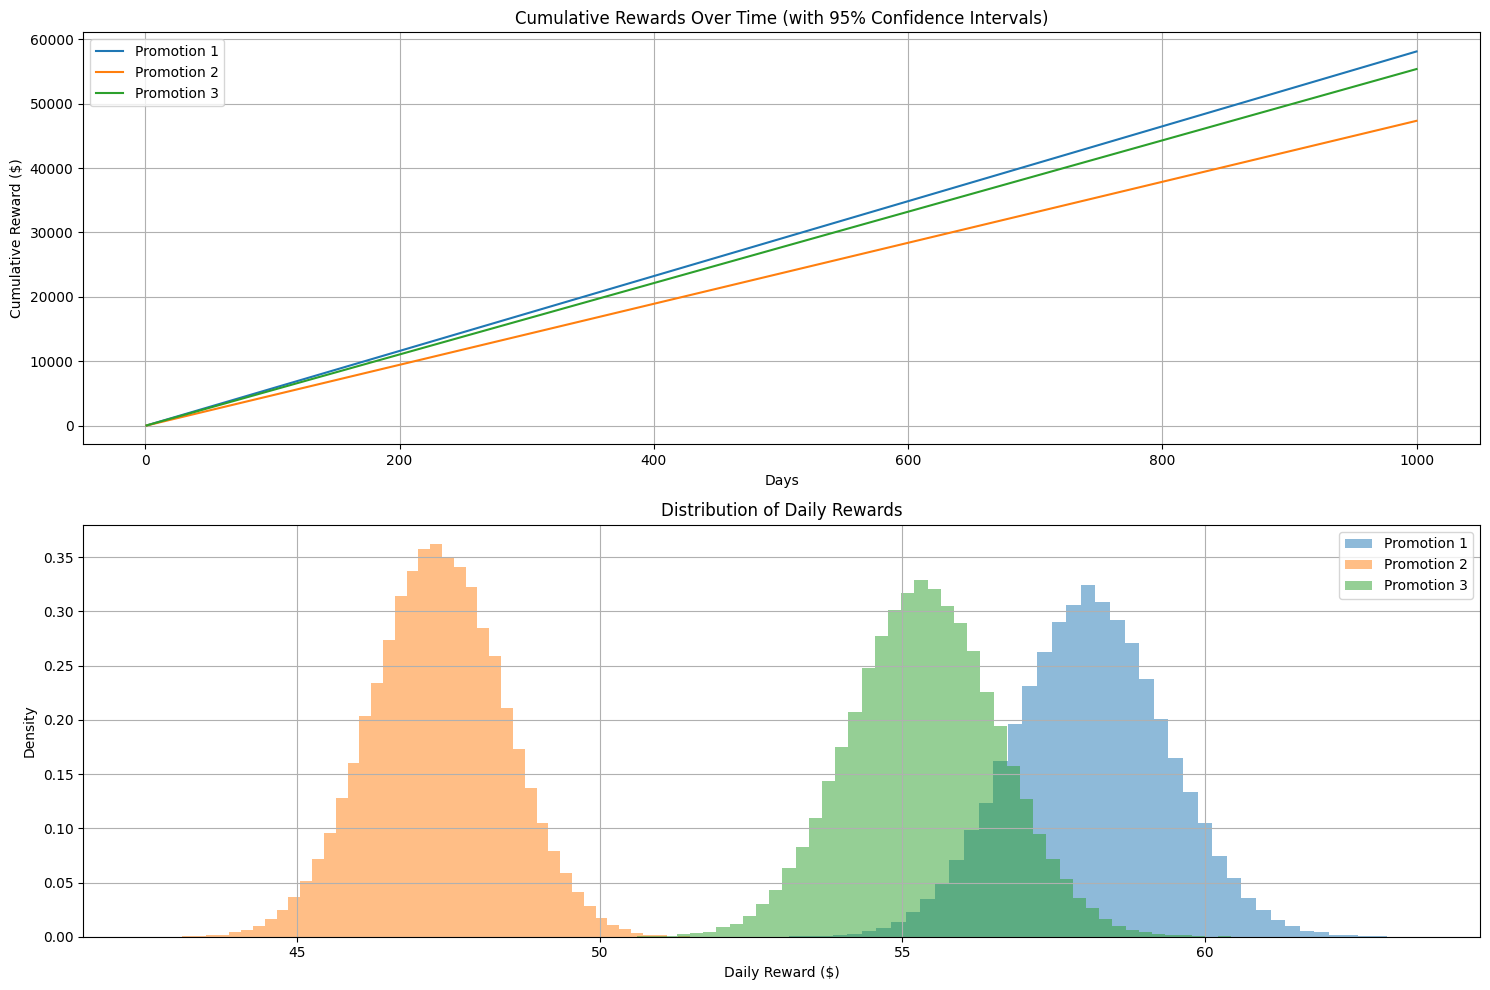


Future Reward Simulation Results
------------------------------------------------

Promotion 1:
- Average Daily Reward: $58.10 ± $1.27
- Expected Total Reward (1000 days): $58096.87
- 95% CI for Total Reward: [$58016.65, $58159.67]

Promotion 2:
- Average Daily Reward: $47.33 ± $1.10
- Expected Total Reward (1000 days): $47331.38
- 95% CI for Total Reward: [$47264.24, $47397.80]

Promotion 3:
- Average Daily Reward: $55.37 ± $1.22
- Expected Total Reward (1000 days): $55366.34
- 95% CI for Total Reward: [$55298.47, $55443.74]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_future_rewards(data, posterior, num_days=1000, num_simulations=100):
    """
    Simulate future rewards with multiple simulation runs to account for uncertainty
    
    Args:
        data: Dictionary containing strategy information
        posterior: Dictionary containing posterior distributions
        num_days: Number of days to simulate
        num_simulations: Number of simulation runs
    """
    # Initialize arrays to store results from multiple simulations
    all_simulations = {key: np.zeros((num_simulations, num_days)) for key in data}
    
    # Run multiple simulations
    for sim in range(num_simulations):
        for key in data:
            # Sample daily rewards from the posterior distribution
            daily_rewards = np.random.normal(
                posterior[key]['mean'], 
                posterior[key]['std'], 
                size=num_days
            )
            all_simulations[key][sim] = daily_rewards
    
    # Calculate statistics across all simulations
    results = {}
    for key in data:
        # Calculate cumulative rewards for each simulation
        cumulative = np.cumsum(all_simulations[key], axis=1)
        
        results[key] = {
            'daily_mean': np.mean(all_simulations[key]),
            'daily_std': np.std(all_simulations[key]),
            'cumulative_mean': np.mean(cumulative, axis=0),
            'cumulative_lower': np.percentile(cumulative, 2.5, axis=0),
            'cumulative_upper': np.percentile(cumulative, 97.5, axis=0)
        }
    
    # Create visualization
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Cumulative Rewards with Confidence Intervals
    plt.subplot(2, 1, 1)
    days = np.arange(1, num_days + 1)
    
    for key in data:
        plt.plot(days, results[key]['cumulative_mean'], 
                label=f"{data[key]['name']}")
        plt.fill_between(days, 
                        results[key]['cumulative_lower'],
                        results[key]['cumulative_upper'],
                        alpha=0.2)
    
    plt.xlabel("Days")
    plt.ylabel("Cumulative Reward ($)")
    plt.title("Cumulative Rewards Over Time (with 95% Confidence Intervals)")
    plt.legend()
    plt.grid(True)
    
    # Plot 2: Distribution of Daily Rewards
    plt.subplot(2, 1, 2)
    for key in data:
        plt.hist(all_simulations[key].flatten(), 
                bins=50, 
                density=True, 
                alpha=0.5,
                label=f"{data[key]['name']}")
    
    plt.xlabel("Daily Reward ($)")
    plt.ylabel("Density")
    plt.title("Distribution of Daily Rewards")
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print("\nFuture Reward Simulation Results")
    print("------------------------------------------------")
    for key in results:
        print(f"\n{data[key]['name']}:")
        print(f"- Average Daily Reward: ${results[key]['daily_mean']:.2f} ± ${results[key]['daily_std']:.2f}")
        print(f"- Expected Total Reward ({num_days} days): ${results[key]['cumulative_mean'][-1]:.2f}")
        print(f"- 95% CI for Total Reward: [${results[key]['cumulative_lower'][-1]:.2f}, "
              f"${results[key]['cumulative_upper'][-1]:.2f}]")
    
    return results

# the simulation with the existing data and posterior
simulation_results = simulate_future_rewards(data, posterior)